# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [2]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

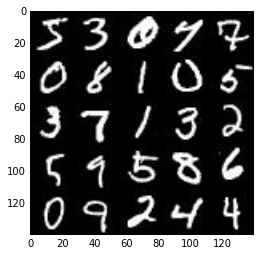

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

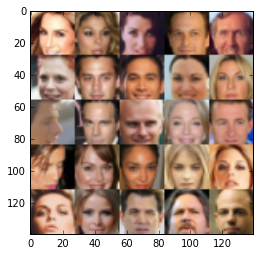

In [4]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [5]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [6]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='inputs_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name="input_z")
    learning_r = tf.placeholder(tf.float32, name="learning_rate")
    
    return inputs_real, inputs_z, learning_r


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [7]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        # First layer - convolution.         
        # Image size - 28x28xy  : y = 1 for MNIST, 3 for celeb
        #alpha = 0.1
        hidden1 = tf.layers.conv2d(images, 64, 3, strides=2, padding='SAME', #)
                                   kernel_initializer = tf.random_normal_initializer(stddev=0.02))

        hidden1 = tf.nn.relu(hidden1) # tf.maximum(alpha * hidden1, hidden1)
        # 14x14x64
        
        # hidden 2 - convolution 
        hidden2 = tf.layers.conv2d(hidden1, 128, 3, strides=2, padding='SAME', #)
                                   kernel_initializer = tf.random_normal_initializer(stddev=0.02))

        hidden2 = tf.layers.batch_normalization(hidden2, training=True)
        hidden2 = tf.nn.relu(hidden2) # tf.maximum(alpha * hidden2, hidden2)
        # 7x7x128

        # hidden 3 - convolution 
        hidden3 = tf.layers.conv2d(hidden2, 256, 3, strides=2, padding='SAME', #)
                                   kernel_initializer = tf.random_normal_initializer(stddev=0.02))

        hidden3 = tf.layers.batch_normalization(hidden3, training=True)
        hidden3 = tf.nn.relu(hidden3) # tf.maximum(alpha * hidden3, hidden3)
        # 4x4x256

        flat = tf.reshape(hidden3, (-1, 4 * 4 * 256)) #(-1, 4 * 4 * 256))
        logits_discr = tf.layers.dense(flat, 1)
        output_discr = tf.nn.sigmoid(logits_discr)
        
    return output_discr, logits_discr



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # fully connected
        hidden = tf.layers.dense(z, 7*7*256) #1024)
        hidden = tf.reshape(hidden, (-1, 7, 7, 256)) #1024))
        hidden = tf.layers.batch_normalization(hidden, training=is_train)
        hidden = tf.nn.relu(hidden)
        # 7x7x256
        
        hidden2 = tf.layers.conv2d_transpose(hidden, 128, 3, strides=2, padding='SAME')
        hidden2 = tf.layers.batch_normalization(hidden2, training=is_train)
        hidden2 = tf.nn.relu(hidden2)
        #14x14x128
                
        hidden3 = tf.layers.conv2d_transpose(hidden2, 64, 3, strides=2, padding='SAME')
        hidden3 = tf.layers.batch_normalization(hidden3, training=is_train)
        hidden3 = tf.nn.relu(hidden3)
        #28x28x64

        out = tf.layers.conv2d_transpose(hidden3, out_channel_dim, 3, strides=2, padding='SAME')
        # 52x52xout_dim
        
        out = tf.image.resize_images(out, size=(28, 28))
        # 28x28xoutput_dim 
        
        output_gen = tf.nn.tanh(out)

    return output_gen



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    smooth = 0.1
    #generator
    g_model = generator(input_z, out_channel_dim, is_train=True)
 
    # discriminator
    d_real_model, d_real_logits = discriminator(input_real, reuse=False)
    d_fake_model, d_fake_logits = discriminator(g_model, reuse=True)
        
    # loss calculation
    d_real_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_real_logits, \
                                                labels=tf.ones_like(d_real_model) * (1 - smooth)))
    
    d_fake_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, \
                                                labels=tf.zeros_like(d_fake_model)))
    dis_loss = d_real_loss + d_fake_loss
    
    gen_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_fake_logits, 
                                                labels=tf.ones_like(d_fake_model)))
    return dis_loss, gen_loss



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    d_train_optmizer = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in update_ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_optmizer = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    

    return d_train_optmizer, g_train_optmizer


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    # Define image dimensions
    _, image_width, image_height, image_channels = data_shape
    
    # Implement model_inputs to set the input_real, input_z, and learning rate
    input_real, input_z, _learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    
    # Setting the d_loss and g_loss
    d_loss, g_loss = model_loss(input_real, input_z, image_channels)
    
    # Call to model_opt for setting d_train_opt and g_train_opt
    d_train_optimizer, g_train_optimizer = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    # Batch counter
    batch_counter = 0
    
    # Number of images to be printed out
    n_images = 25
    
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                # Increment the batch counter
                batch_counter += 1
                
                # Once the dataset ranges from -0.5 to 0.5, it must multiply batch_images by 2
                batch_images = batch_images*2.0
                
                # Setting random noise for generator input usage
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                # Run the defined optimizers
                _ = sess.run(d_train_optimizer, feed_dict={input_real: batch_images, input_z: batch_z})
                _ = sess.run(g_train_optimizer, feed_dict={input_z: batch_z})                                

                # Print the discriminator train loss and generator train loss every 10 batches
                if (batch_counter % 10 == 0):
                    train_loss_dis = sess.run(d_loss, {input_z: batch_z, input_real: batch_images})
                    train_loss_gen = g_loss.eval({input_z: batch_z})
                    
                    print("Epoch {}/{}... Step: {}".format(epoch_i+1, epochs, batch_counter),
                          "Discriminator Loss: {:.4f}...".format(train_loss_dis),
                          "Generator Loss: {:.4f}".format(train_loss_gen))   
                    
                # Print the generator output for every 100 batches
                if (batch_counter % 100 == 0):
                    print("Generating outputs...")
                    show_generator_output(sess, n_images, input_z, image_channels, data_image_mode)

                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Step: 10 Discriminator Loss: 0.9302... Generator Loss: 5.1725
Epoch 1/2... Step: 20 Discriminator Loss: 3.3230... Generator Loss: 3.4343
Epoch 1/2... Step: 30 Discriminator Loss: 1.9576... Generator Loss: 1.7851
Epoch 1/2... Step: 40 Discriminator Loss: 1.8923... Generator Loss: 1.8867
Epoch 1/2... Step: 50 Discriminator Loss: 2.1166... Generator Loss: 2.0138
Epoch 1/2... Step: 60 Discriminator Loss: 1.5326... Generator Loss: 1.4007
Epoch 1/2... Step: 70 Discriminator Loss: 1.7114... Generator Loss: 1.2822
Epoch 1/2... Step: 80 Discriminator Loss: 1.5239... Generator Loss: 1.3191
Epoch 1/2... Step: 90 Discriminator Loss: 1.4873... Generator Loss: 1.2713
Epoch 1/2... Step: 100 Discriminator Loss: 1.7134... Generator Loss: 1.5982
Generating outputs...


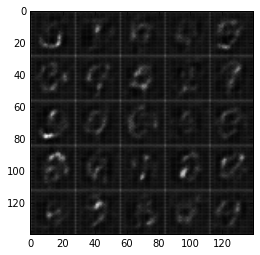

Epoch 1/2... Step: 110 Discriminator Loss: 1.4815... Generator Loss: 1.4980
Epoch 1/2... Step: 120 Discriminator Loss: 1.6820... Generator Loss: 1.8513
Epoch 1/2... Step: 130 Discriminator Loss: 1.6086... Generator Loss: 1.9532
Epoch 1/2... Step: 140 Discriminator Loss: 1.8801... Generator Loss: 1.9490
Epoch 1/2... Step: 150 Discriminator Loss: 1.6627... Generator Loss: 2.0567
Epoch 1/2... Step: 160 Discriminator Loss: 1.5078... Generator Loss: 1.5921
Epoch 1/2... Step: 170 Discriminator Loss: 1.7519... Generator Loss: 1.8553
Epoch 1/2... Step: 180 Discriminator Loss: 1.3519... Generator Loss: 1.4947
Epoch 1/2... Step: 190 Discriminator Loss: 1.1943... Generator Loss: 2.4517
Epoch 1/2... Step: 200 Discriminator Loss: 1.6293... Generator Loss: 2.1438
Generating outputs...


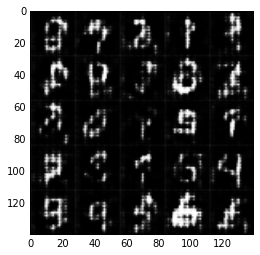

Epoch 1/2... Step: 210 Discriminator Loss: 1.4856... Generator Loss: 1.3265
Epoch 1/2... Step: 220 Discriminator Loss: 1.4512... Generator Loss: 1.4307
Epoch 1/2... Step: 230 Discriminator Loss: 1.3137... Generator Loss: 0.8705
Epoch 1/2... Step: 240 Discriminator Loss: 1.2933... Generator Loss: 1.2917
Epoch 1/2... Step: 250 Discriminator Loss: 1.4957... Generator Loss: 1.5583
Epoch 1/2... Step: 260 Discriminator Loss: 1.3040... Generator Loss: 1.0877
Epoch 1/2... Step: 270 Discriminator Loss: 1.3133... Generator Loss: 1.3124
Epoch 1/2... Step: 280 Discriminator Loss: 1.5784... Generator Loss: 1.5915
Epoch 1/2... Step: 290 Discriminator Loss: 1.8483... Generator Loss: 2.3143
Epoch 1/2... Step: 300 Discriminator Loss: 1.2780... Generator Loss: 0.7602
Generating outputs...


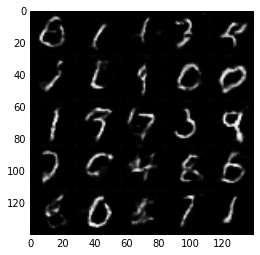

Epoch 1/2... Step: 310 Discriminator Loss: 1.6230... Generator Loss: 0.3992
Epoch 1/2... Step: 320 Discriminator Loss: 1.4575... Generator Loss: 0.4906
Epoch 1/2... Step: 330 Discriminator Loss: 1.6326... Generator Loss: 0.3790
Epoch 1/2... Step: 340 Discriminator Loss: 1.7777... Generator Loss: 0.3220
Epoch 1/2... Step: 350 Discriminator Loss: 1.3556... Generator Loss: 0.5699
Epoch 1/2... Step: 360 Discriminator Loss: 1.6553... Generator Loss: 0.3684
Epoch 1/2... Step: 370 Discriminator Loss: 1.3838... Generator Loss: 1.6043
Epoch 1/2... Step: 380 Discriminator Loss: 1.2390... Generator Loss: 1.1566
Epoch 1/2... Step: 390 Discriminator Loss: 1.3682... Generator Loss: 1.3028
Epoch 1/2... Step: 400 Discriminator Loss: 1.5833... Generator Loss: 1.7757
Generating outputs...


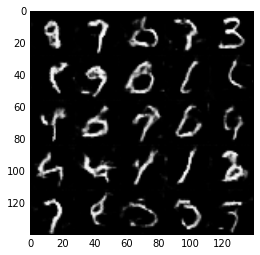

Epoch 1/2... Step: 410 Discriminator Loss: 1.5075... Generator Loss: 2.1799
Epoch 1/2... Step: 420 Discriminator Loss: 1.0085... Generator Loss: 1.1225
Epoch 1/2... Step: 430 Discriminator Loss: 1.2658... Generator Loss: 1.0652
Epoch 1/2... Step: 440 Discriminator Loss: 1.2713... Generator Loss: 1.5824
Epoch 1/2... Step: 450 Discriminator Loss: 1.4028... Generator Loss: 1.6390
Epoch 1/2... Step: 460 Discriminator Loss: 1.3797... Generator Loss: 0.5417
Epoch 2/2... Step: 470 Discriminator Loss: 1.3258... Generator Loss: 0.9705
Epoch 2/2... Step: 480 Discriminator Loss: 1.1375... Generator Loss: 0.9374
Epoch 2/2... Step: 490 Discriminator Loss: 1.2478... Generator Loss: 0.8222
Epoch 2/2... Step: 500 Discriminator Loss: 1.4175... Generator Loss: 0.6077
Generating outputs...


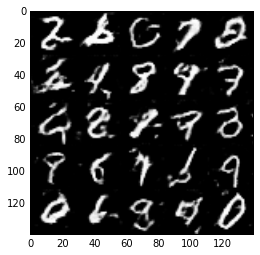

Epoch 2/2... Step: 510 Discriminator Loss: 1.4235... Generator Loss: 0.5781
Epoch 2/2... Step: 520 Discriminator Loss: 1.6910... Generator Loss: 0.3408
Epoch 2/2... Step: 530 Discriminator Loss: 1.3419... Generator Loss: 0.5978
Epoch 2/2... Step: 540 Discriminator Loss: 1.3806... Generator Loss: 0.6004
Epoch 2/2... Step: 550 Discriminator Loss: 1.4601... Generator Loss: 0.5273
Epoch 2/2... Step: 560 Discriminator Loss: 1.5030... Generator Loss: 0.4588
Epoch 2/2... Step: 570 Discriminator Loss: 1.6385... Generator Loss: 0.3901
Epoch 2/2... Step: 580 Discriminator Loss: 1.1957... Generator Loss: 0.9810
Epoch 2/2... Step: 590 Discriminator Loss: 1.5936... Generator Loss: 0.4158
Epoch 2/2... Step: 600 Discriminator Loss: 1.4424... Generator Loss: 0.4733
Generating outputs...


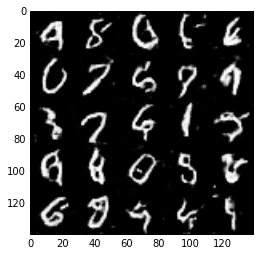

Epoch 2/2... Step: 610 Discriminator Loss: 1.2750... Generator Loss: 0.6998
Epoch 2/2... Step: 620 Discriminator Loss: 1.4244... Generator Loss: 0.4970
Epoch 2/2... Step: 630 Discriminator Loss: 1.7055... Generator Loss: 0.3482
Epoch 2/2... Step: 640 Discriminator Loss: 1.5182... Generator Loss: 0.4391
Epoch 2/2... Step: 650 Discriminator Loss: 1.4673... Generator Loss: 0.4676
Epoch 2/2... Step: 660 Discriminator Loss: 1.5726... Generator Loss: 0.4164
Epoch 2/2... Step: 670 Discriminator Loss: 1.2794... Generator Loss: 0.6601
Epoch 2/2... Step: 680 Discriminator Loss: 1.2575... Generator Loss: 1.1053
Epoch 2/2... Step: 690 Discriminator Loss: 1.5154... Generator Loss: 0.4619
Epoch 2/2... Step: 700 Discriminator Loss: 1.3188... Generator Loss: 0.6105
Generating outputs...


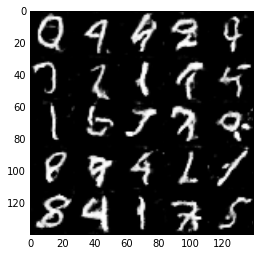

Epoch 2/2... Step: 710 Discriminator Loss: 1.4469... Generator Loss: 0.4812
Epoch 2/2... Step: 720 Discriminator Loss: 1.7620... Generator Loss: 0.3459
Epoch 2/2... Step: 730 Discriminator Loss: 1.3277... Generator Loss: 0.6260
Epoch 2/2... Step: 740 Discriminator Loss: 1.0483... Generator Loss: 1.6606
Epoch 2/2... Step: 750 Discriminator Loss: 1.1217... Generator Loss: 1.1378
Epoch 2/2... Step: 760 Discriminator Loss: 1.3012... Generator Loss: 1.6179
Epoch 2/2... Step: 770 Discriminator Loss: 1.9235... Generator Loss: 2.8339
Epoch 2/2... Step: 780 Discriminator Loss: 1.2191... Generator Loss: 1.2804
Epoch 2/2... Step: 790 Discriminator Loss: 1.0652... Generator Loss: 0.9595
Epoch 2/2... Step: 800 Discriminator Loss: 1.1957... Generator Loss: 1.3643
Generating outputs...


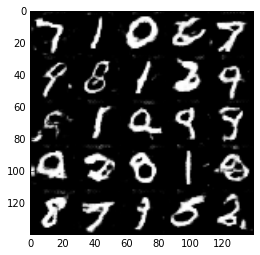

Epoch 2/2... Step: 810 Discriminator Loss: 1.1128... Generator Loss: 1.4070
Epoch 2/2... Step: 820 Discriminator Loss: 1.0906... Generator Loss: 1.1752
Epoch 2/2... Step: 830 Discriminator Loss: 1.4320... Generator Loss: 0.4976
Epoch 2/2... Step: 840 Discriminator Loss: 1.5535... Generator Loss: 0.4434
Epoch 2/2... Step: 850 Discriminator Loss: 1.6399... Generator Loss: 0.3736
Epoch 2/2... Step: 860 Discriminator Loss: 1.4029... Generator Loss: 0.5439
Epoch 2/2... Step: 870 Discriminator Loss: 1.2480... Generator Loss: 0.6825
Epoch 2/2... Step: 880 Discriminator Loss: 1.5305... Generator Loss: 0.4936
Epoch 2/2... Step: 890 Discriminator Loss: 1.0111... Generator Loss: 1.3874
Epoch 2/2... Step: 900 Discriminator Loss: 1.2207... Generator Loss: 1.2423
Generating outputs...


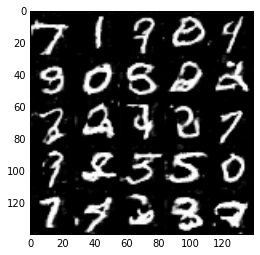

Epoch 2/2... Step: 910 Discriminator Loss: 1.1184... Generator Loss: 1.5530
Epoch 2/2... Step: 920 Discriminator Loss: 1.0107... Generator Loss: 1.2415
Epoch 2/2... Step: 930 Discriminator Loss: 1.2890... Generator Loss: 0.6303


In [13]:
batch_size = 128
z_dim = 100
learning_rate = 0.003
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Step: 10 Discriminator Loss: 0.9113... Generator Loss: 1.0300
Epoch 1/1... Step: 20 Discriminator Loss: 0.7096... Generator Loss: 1.3606
Epoch 1/1... Step: 30 Discriminator Loss: 0.5852... Generator Loss: 1.7385
Epoch 1/1... Step: 40 Discriminator Loss: 0.5148... Generator Loss: 2.0203
Epoch 1/1... Step: 50 Discriminator Loss: 0.5978... Generator Loss: 1.7858
Epoch 1/1... Step: 60 Discriminator Loss: 0.4778... Generator Loss: 2.3301
Epoch 1/1... Step: 70 Discriminator Loss: 0.4068... Generator Loss: 2.9803
Epoch 1/1... Step: 80 Discriminator Loss: 0.4685... Generator Loss: 2.3464
Epoch 1/1... Step: 90 Discriminator Loss: 0.4560... Generator Loss: 2.6973
Epoch 1/1... Step: 100 Discriminator Loss: 0.4948... Generator Loss: 2.0998
Generating outputs...


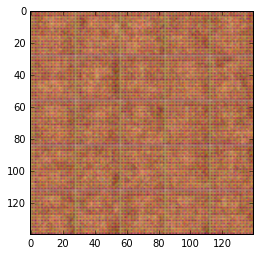

Epoch 1/1... Step: 110 Discriminator Loss: 0.5584... Generator Loss: 3.0741
Epoch 1/1... Step: 120 Discriminator Loss: 0.5314... Generator Loss: 2.2108
Epoch 1/1... Step: 130 Discriminator Loss: 0.5756... Generator Loss: 2.6043
Epoch 1/1... Step: 140 Discriminator Loss: 0.5809... Generator Loss: 1.9172
Epoch 1/1... Step: 150 Discriminator Loss: 0.5523... Generator Loss: 2.5550
Epoch 1/1... Step: 160 Discriminator Loss: 0.6707... Generator Loss: 1.5440
Epoch 1/1... Step: 170 Discriminator Loss: 0.6346... Generator Loss: 2.8101
Epoch 1/1... Step: 180 Discriminator Loss: 0.7371... Generator Loss: 1.2792
Epoch 1/1... Step: 190 Discriminator Loss: 0.6524... Generator Loss: 1.5788
Epoch 1/1... Step: 200 Discriminator Loss: 0.5586... Generator Loss: 2.2494
Generating outputs...


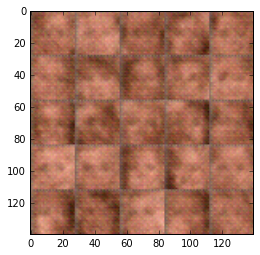

Epoch 1/1... Step: 210 Discriminator Loss: 0.5637... Generator Loss: 1.9954
Epoch 1/1... Step: 220 Discriminator Loss: 0.5377... Generator Loss: 2.1656
Epoch 1/1... Step: 230 Discriminator Loss: 0.6742... Generator Loss: 1.5509
Epoch 1/1... Step: 240 Discriminator Loss: 0.5795... Generator Loss: 2.0027
Epoch 1/1... Step: 250 Discriminator Loss: 0.6443... Generator Loss: 1.6509
Epoch 1/1... Step: 260 Discriminator Loss: 0.5799... Generator Loss: 2.2656
Epoch 1/1... Step: 270 Discriminator Loss: 0.8411... Generator Loss: 1.1268
Epoch 1/1... Step: 280 Discriminator Loss: 0.7420... Generator Loss: 1.9381
Epoch 1/1... Step: 290 Discriminator Loss: 0.6915... Generator Loss: 2.0855
Epoch 1/1... Step: 300 Discriminator Loss: 0.7224... Generator Loss: 1.6803
Generating outputs...


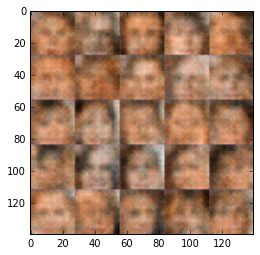

Epoch 1/1... Step: 310 Discriminator Loss: 0.6798... Generator Loss: 1.9127
Epoch 1/1... Step: 320 Discriminator Loss: 0.7602... Generator Loss: 1.2946
Epoch 1/1... Step: 330 Discriminator Loss: 0.7077... Generator Loss: 2.5178
Epoch 1/1... Step: 340 Discriminator Loss: 0.7398... Generator Loss: 1.4028
Epoch 1/1... Step: 350 Discriminator Loss: 0.7215... Generator Loss: 2.2469
Epoch 1/1... Step: 360 Discriminator Loss: 0.6980... Generator Loss: 1.5059
Epoch 1/1... Step: 370 Discriminator Loss: 0.5634... Generator Loss: 2.0988
Epoch 1/1... Step: 380 Discriminator Loss: 0.7662... Generator Loss: 1.2146
Epoch 1/1... Step: 390 Discriminator Loss: 0.7210... Generator Loss: 1.3557
Epoch 1/1... Step: 400 Discriminator Loss: 0.6404... Generator Loss: 1.8182
Generating outputs...


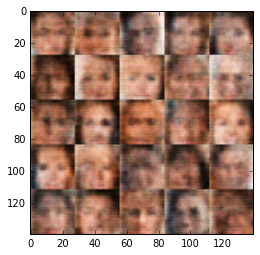

Epoch 1/1... Step: 410 Discriminator Loss: 0.6451... Generator Loss: 1.9960
Epoch 1/1... Step: 420 Discriminator Loss: 0.6060... Generator Loss: 2.0136
Epoch 1/1... Step: 430 Discriminator Loss: 0.6698... Generator Loss: 1.5415
Epoch 1/1... Step: 440 Discriminator Loss: 0.8340... Generator Loss: 1.0287
Epoch 1/1... Step: 450 Discriminator Loss: 0.7825... Generator Loss: 2.7160
Epoch 1/1... Step: 460 Discriminator Loss: 0.6446... Generator Loss: 1.6601
Epoch 1/1... Step: 470 Discriminator Loss: 0.6324... Generator Loss: 1.7754
Epoch 1/1... Step: 480 Discriminator Loss: 0.5851... Generator Loss: 2.0802
Epoch 1/1... Step: 490 Discriminator Loss: 0.6975... Generator Loss: 1.5983
Epoch 1/1... Step: 500 Discriminator Loss: 0.5867... Generator Loss: 2.2200
Generating outputs...


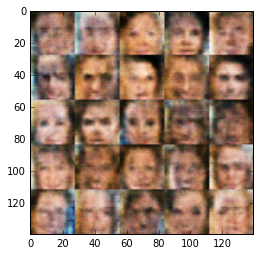

Epoch 1/1... Step: 510 Discriminator Loss: 0.5710... Generator Loss: 2.1317
Epoch 1/1... Step: 520 Discriminator Loss: 0.8257... Generator Loss: 1.1411
Epoch 1/1... Step: 530 Discriminator Loss: 0.6856... Generator Loss: 1.5624
Epoch 1/1... Step: 540 Discriminator Loss: 0.7638... Generator Loss: 1.2651
Epoch 1/1... Step: 550 Discriminator Loss: 0.6924... Generator Loss: 1.4830
Epoch 1/1... Step: 560 Discriminator Loss: 0.5131... Generator Loss: 2.6904
Epoch 1/1... Step: 570 Discriminator Loss: 0.6599... Generator Loss: 1.7347
Epoch 1/1... Step: 580 Discriminator Loss: 0.7425... Generator Loss: 1.3217
Epoch 1/1... Step: 590 Discriminator Loss: 0.6547... Generator Loss: 1.9606
Epoch 1/1... Step: 600 Discriminator Loss: 0.5674... Generator Loss: 2.1626
Generating outputs...


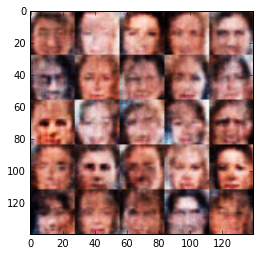

Epoch 1/1... Step: 610 Discriminator Loss: 0.6636... Generator Loss: 1.6575
Epoch 1/1... Step: 620 Discriminator Loss: 0.7236... Generator Loss: 1.4044
Epoch 1/1... Step: 630 Discriminator Loss: 0.7360... Generator Loss: 1.3907
Epoch 1/1... Step: 640 Discriminator Loss: 0.5294... Generator Loss: 2.1910
Epoch 1/1... Step: 650 Discriminator Loss: 0.5695... Generator Loss: 1.9829
Epoch 1/1... Step: 660 Discriminator Loss: 0.7700... Generator Loss: 1.5344
Epoch 1/1... Step: 670 Discriminator Loss: 0.7271... Generator Loss: 1.7221
Epoch 1/1... Step: 680 Discriminator Loss: 0.8211... Generator Loss: 1.8477
Epoch 1/1... Step: 690 Discriminator Loss: 0.6799... Generator Loss: 1.8402
Epoch 1/1... Step: 700 Discriminator Loss: 0.6160... Generator Loss: 1.7507
Generating outputs...


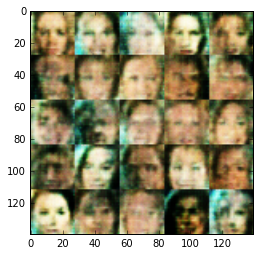

Epoch 1/1... Step: 710 Discriminator Loss: 0.6334... Generator Loss: 1.7712
Epoch 1/1... Step: 720 Discriminator Loss: 0.6242... Generator Loss: 1.9403
Epoch 1/1... Step: 730 Discriminator Loss: 0.9683... Generator Loss: 1.0245
Epoch 1/1... Step: 740 Discriminator Loss: 0.8876... Generator Loss: 1.3373
Epoch 1/1... Step: 750 Discriminator Loss: 0.8748... Generator Loss: 1.7801
Epoch 1/1... Step: 760 Discriminator Loss: 1.0172... Generator Loss: 0.8593
Epoch 1/1... Step: 770 Discriminator Loss: 0.7074... Generator Loss: 1.8559
Epoch 1/1... Step: 780 Discriminator Loss: 0.9406... Generator Loss: 1.8597
Epoch 1/1... Step: 790 Discriminator Loss: 0.8398... Generator Loss: 1.2405
Epoch 1/1... Step: 800 Discriminator Loss: 1.0296... Generator Loss: 2.2460
Generating outputs...


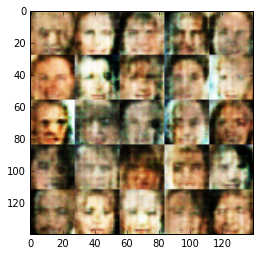

Epoch 1/1... Step: 810 Discriminator Loss: 0.8750... Generator Loss: 1.4031
Epoch 1/1... Step: 820 Discriminator Loss: 0.8518... Generator Loss: 1.1761
Epoch 1/1... Step: 830 Discriminator Loss: 0.7479... Generator Loss: 1.8482
Epoch 1/1... Step: 840 Discriminator Loss: 0.8373... Generator Loss: 1.1499
Epoch 1/1... Step: 850 Discriminator Loss: 0.8077... Generator Loss: 2.0456
Epoch 1/1... Step: 860 Discriminator Loss: 0.9932... Generator Loss: 0.9680
Epoch 1/1... Step: 870 Discriminator Loss: 0.7486... Generator Loss: 1.6268
Epoch 1/1... Step: 880 Discriminator Loss: 0.8753... Generator Loss: 1.0705
Epoch 1/1... Step: 890 Discriminator Loss: 1.0810... Generator Loss: 1.2347
Epoch 1/1... Step: 900 Discriminator Loss: 0.8692... Generator Loss: 1.1841
Generating outputs...


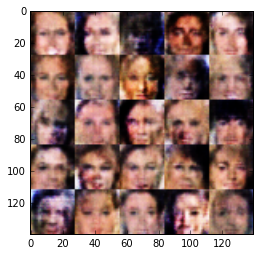

Epoch 1/1... Step: 910 Discriminator Loss: 0.9088... Generator Loss: 1.1713
Epoch 1/1... Step: 920 Discriminator Loss: 0.9938... Generator Loss: 0.9938
Epoch 1/1... Step: 930 Discriminator Loss: 0.9394... Generator Loss: 1.9420
Epoch 1/1... Step: 940 Discriminator Loss: 0.7376... Generator Loss: 1.7609
Epoch 1/1... Step: 950 Discriminator Loss: 0.8364... Generator Loss: 1.1501
Epoch 1/1... Step: 960 Discriminator Loss: 0.8624... Generator Loss: 1.2396
Epoch 1/1... Step: 970 Discriminator Loss: 0.8851... Generator Loss: 1.3026
Epoch 1/1... Step: 980 Discriminator Loss: 0.9030... Generator Loss: 1.0452
Epoch 1/1... Step: 990 Discriminator Loss: 0.9445... Generator Loss: 1.3486
Epoch 1/1... Step: 1000 Discriminator Loss: 0.9656... Generator Loss: 0.8996
Generating outputs...


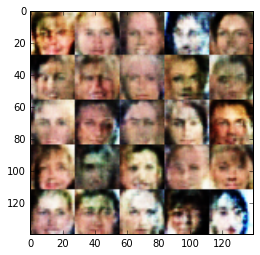

Epoch 1/1... Step: 1010 Discriminator Loss: 0.9991... Generator Loss: 2.0651
Epoch 1/1... Step: 1020 Discriminator Loss: 1.1780... Generator Loss: 0.6557
Epoch 1/1... Step: 1030 Discriminator Loss: 0.9093... Generator Loss: 1.0871
Epoch 1/1... Step: 1040 Discriminator Loss: 0.9254... Generator Loss: 1.2436
Epoch 1/1... Step: 1050 Discriminator Loss: 0.9163... Generator Loss: 1.1214
Epoch 1/1... Step: 1060 Discriminator Loss: 0.8850... Generator Loss: 1.6565
Epoch 1/1... Step: 1070 Discriminator Loss: 1.0012... Generator Loss: 0.9034
Epoch 1/1... Step: 1080 Discriminator Loss: 0.9476... Generator Loss: 1.2556
Epoch 1/1... Step: 1090 Discriminator Loss: 1.4261... Generator Loss: 0.4817
Epoch 1/1... Step: 1100 Discriminator Loss: 0.9145... Generator Loss: 1.0658
Generating outputs...


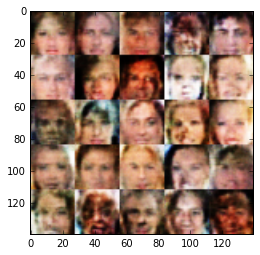

Epoch 1/1... Step: 1110 Discriminator Loss: 0.8890... Generator Loss: 1.2651
Epoch 1/1... Step: 1120 Discriminator Loss: 0.8055... Generator Loss: 1.4262
Epoch 1/1... Step: 1130 Discriminator Loss: 0.9896... Generator Loss: 0.9695
Epoch 1/1... Step: 1140 Discriminator Loss: 0.8615... Generator Loss: 1.1639
Epoch 1/1... Step: 1150 Discriminator Loss: 0.9118... Generator Loss: 1.2986
Epoch 1/1... Step: 1160 Discriminator Loss: 1.0008... Generator Loss: 1.1798
Epoch 1/1... Step: 1170 Discriminator Loss: 0.8835... Generator Loss: 1.4010
Epoch 1/1... Step: 1180 Discriminator Loss: 0.8833... Generator Loss: 1.1798
Epoch 1/1... Step: 1190 Discriminator Loss: 0.8628... Generator Loss: 1.3981
Epoch 1/1... Step: 1200 Discriminator Loss: 1.1065... Generator Loss: 1.5989
Generating outputs...


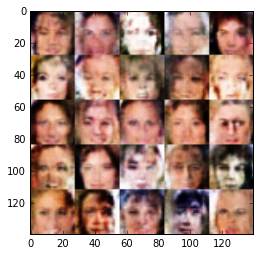

Epoch 1/1... Step: 1210 Discriminator Loss: 0.9282... Generator Loss: 1.1166
Epoch 1/1... Step: 1220 Discriminator Loss: 0.8939... Generator Loss: 1.1192
Epoch 1/1... Step: 1230 Discriminator Loss: 0.9483... Generator Loss: 1.0344
Epoch 1/1... Step: 1240 Discriminator Loss: 0.9573... Generator Loss: 1.1047
Epoch 1/1... Step: 1250 Discriminator Loss: 0.9669... Generator Loss: 1.0525
Epoch 1/1... Step: 1260 Discriminator Loss: 0.9961... Generator Loss: 0.9603
Epoch 1/1... Step: 1270 Discriminator Loss: 1.0575... Generator Loss: 0.8373
Epoch 1/1... Step: 1280 Discriminator Loss: 1.1499... Generator Loss: 0.6886
Epoch 1/1... Step: 1290 Discriminator Loss: 0.8256... Generator Loss: 1.6436
Epoch 1/1... Step: 1300 Discriminator Loss: 1.1227... Generator Loss: 0.7129
Generating outputs...


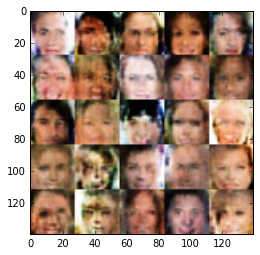

Epoch 1/1... Step: 1310 Discriminator Loss: 1.1207... Generator Loss: 0.7229
Epoch 1/1... Step: 1320 Discriminator Loss: 1.1161... Generator Loss: 0.7689
Epoch 1/1... Step: 1330 Discriminator Loss: 0.7898... Generator Loss: 1.2998
Epoch 1/1... Step: 1340 Discriminator Loss: 0.7681... Generator Loss: 1.7528
Epoch 1/1... Step: 1350 Discriminator Loss: 0.8136... Generator Loss: 1.3299
Epoch 1/1... Step: 1360 Discriminator Loss: 0.7597... Generator Loss: 1.7276
Epoch 1/1... Step: 1370 Discriminator Loss: 0.9108... Generator Loss: 1.0804
Epoch 1/1... Step: 1380 Discriminator Loss: 0.8599... Generator Loss: 1.1988
Epoch 1/1... Step: 1390 Discriminator Loss: 0.8823... Generator Loss: 1.3511
Epoch 1/1... Step: 1400 Discriminator Loss: 0.9749... Generator Loss: 1.1507
Generating outputs...


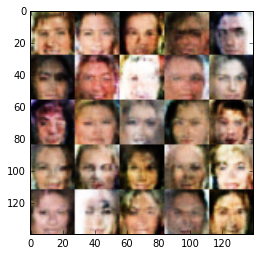

Epoch 1/1... Step: 1410 Discriminator Loss: 0.9038... Generator Loss: 1.0847
Epoch 1/1... Step: 1420 Discriminator Loss: 0.8952... Generator Loss: 1.0191
Epoch 1/1... Step: 1430 Discriminator Loss: 0.8556... Generator Loss: 1.1327
Epoch 1/1... Step: 1440 Discriminator Loss: 1.0619... Generator Loss: 0.7891
Epoch 1/1... Step: 1450 Discriminator Loss: 1.0671... Generator Loss: 0.7585
Epoch 1/1... Step: 1460 Discriminator Loss: 0.7324... Generator Loss: 1.6804
Epoch 1/1... Step: 1470 Discriminator Loss: 1.1003... Generator Loss: 1.6128
Epoch 1/1... Step: 1480 Discriminator Loss: 1.1008... Generator Loss: 0.7194
Epoch 1/1... Step: 1490 Discriminator Loss: 0.8829... Generator Loss: 1.0376
Epoch 1/1... Step: 1500 Discriminator Loss: 1.3018... Generator Loss: 0.5367
Generating outputs...


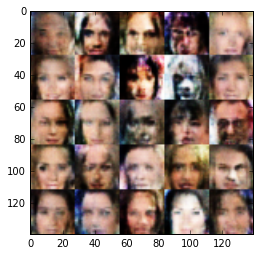

Epoch 1/1... Step: 1510 Discriminator Loss: 0.8483... Generator Loss: 1.6260
Epoch 1/1... Step: 1520 Discriminator Loss: 0.8154... Generator Loss: 1.2518
Epoch 1/1... Step: 1530 Discriminator Loss: 0.7563... Generator Loss: 1.3848
Epoch 1/1... Step: 1540 Discriminator Loss: 0.6822... Generator Loss: 1.7271
Epoch 1/1... Step: 1550 Discriminator Loss: 0.8835... Generator Loss: 1.5901
Epoch 1/1... Step: 1560 Discriminator Loss: 0.8061... Generator Loss: 1.3275
Epoch 1/1... Step: 1570 Discriminator Loss: 0.8795... Generator Loss: 1.5646
Epoch 1/1... Step: 1580 Discriminator Loss: 0.7670... Generator Loss: 1.4490
Epoch 1/1... Step: 1590 Discriminator Loss: 0.8020... Generator Loss: 1.7684
Epoch 1/1... Step: 1600 Discriminator Loss: 0.7999... Generator Loss: 1.3534
Generating outputs...


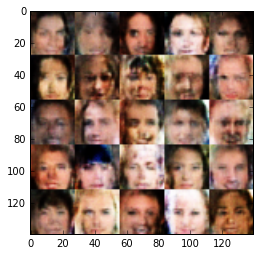

Epoch 1/1... Step: 1610 Discriminator Loss: 0.8678... Generator Loss: 1.1965
Epoch 1/1... Step: 1620 Discriminator Loss: 1.0265... Generator Loss: 0.8457
Epoch 1/1... Step: 1630 Discriminator Loss: 0.8902... Generator Loss: 1.2150
Epoch 1/1... Step: 1640 Discriminator Loss: 1.0840... Generator Loss: 0.8913
Epoch 1/1... Step: 1650 Discriminator Loss: 0.7731... Generator Loss: 1.5555
Epoch 1/1... Step: 1660 Discriminator Loss: 0.8602... Generator Loss: 1.1769
Epoch 1/1... Step: 1670 Discriminator Loss: 1.0265... Generator Loss: 1.1251
Epoch 1/1... Step: 1680 Discriminator Loss: 0.9200... Generator Loss: 1.0893
Epoch 1/1... Step: 1690 Discriminator Loss: 0.8737... Generator Loss: 1.1277
Epoch 1/1... Step: 1700 Discriminator Loss: 0.8454... Generator Loss: 1.4125
Generating outputs...


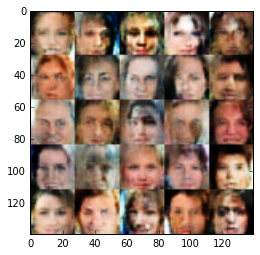

Epoch 1/1... Step: 1710 Discriminator Loss: 0.8645... Generator Loss: 1.0260
Epoch 1/1... Step: 1720 Discriminator Loss: 0.8678... Generator Loss: 1.3579
Epoch 1/1... Step: 1730 Discriminator Loss: 1.1548... Generator Loss: 1.2711
Epoch 1/1... Step: 1740 Discriminator Loss: 0.9351... Generator Loss: 1.2324
Epoch 1/1... Step: 1750 Discriminator Loss: 0.9393... Generator Loss: 1.2281
Epoch 1/1... Step: 1760 Discriminator Loss: 0.9700... Generator Loss: 1.3947
Epoch 1/1... Step: 1770 Discriminator Loss: 0.7775... Generator Loss: 1.3330
Epoch 1/1... Step: 1780 Discriminator Loss: 0.9277... Generator Loss: 0.9249
Epoch 1/1... Step: 1790 Discriminator Loss: 1.0175... Generator Loss: 1.0826
Epoch 1/1... Step: 1800 Discriminator Loss: 0.8306... Generator Loss: 1.2578
Generating outputs...


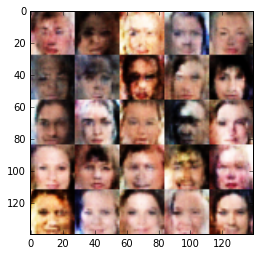

Epoch 1/1... Step: 1810 Discriminator Loss: 1.0867... Generator Loss: 1.3104
Epoch 1/1... Step: 1820 Discriminator Loss: 0.9473... Generator Loss: 1.1628
Epoch 1/1... Step: 1830 Discriminator Loss: 0.7849... Generator Loss: 1.4070
Epoch 1/1... Step: 1840 Discriminator Loss: 0.8601... Generator Loss: 1.2076
Epoch 1/1... Step: 1850 Discriminator Loss: 1.5582... Generator Loss: 0.6046
Epoch 1/1... Step: 1860 Discriminator Loss: 0.8957... Generator Loss: 1.1711
Epoch 1/1... Step: 1870 Discriminator Loss: 1.0011... Generator Loss: 0.9933
Epoch 1/1... Step: 1880 Discriminator Loss: 1.0715... Generator Loss: 0.9133
Epoch 1/1... Step: 1890 Discriminator Loss: 0.7223... Generator Loss: 1.7426
Epoch 1/1... Step: 1900 Discriminator Loss: 0.9881... Generator Loss: 1.0443
Generating outputs...


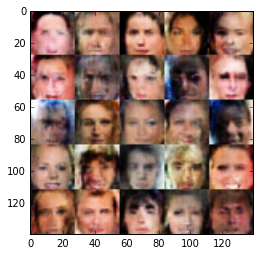

Epoch 1/1... Step: 1910 Discriminator Loss: 0.9573... Generator Loss: 0.9867
Epoch 1/1... Step: 1920 Discriminator Loss: 1.1170... Generator Loss: 0.8181
Epoch 1/1... Step: 1930 Discriminator Loss: 0.8513... Generator Loss: 1.0804
Epoch 1/1... Step: 1940 Discriminator Loss: 1.0045... Generator Loss: 1.2101
Epoch 1/1... Step: 1950 Discriminator Loss: 0.9149... Generator Loss: 1.1752
Epoch 1/1... Step: 1960 Discriminator Loss: 0.8673... Generator Loss: 1.2238
Epoch 1/1... Step: 1970 Discriminator Loss: 1.3369... Generator Loss: 0.6031
Epoch 1/1... Step: 1980 Discriminator Loss: 0.7471... Generator Loss: 1.2871
Epoch 1/1... Step: 1990 Discriminator Loss: 0.8281... Generator Loss: 1.4347
Epoch 1/1... Step: 2000 Discriminator Loss: 0.8801... Generator Loss: 1.1984
Generating outputs...


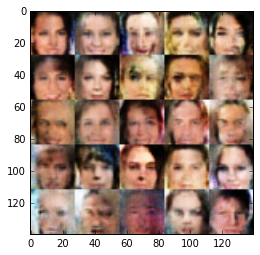

Epoch 1/1... Step: 2010 Discriminator Loss: 1.1157... Generator Loss: 0.7174
Epoch 1/1... Step: 2020 Discriminator Loss: 0.9774... Generator Loss: 1.0051
Epoch 1/1... Step: 2030 Discriminator Loss: 1.0935... Generator Loss: 0.9357
Epoch 1/1... Step: 2040 Discriminator Loss: 0.9001... Generator Loss: 1.0397
Epoch 1/1... Step: 2050 Discriminator Loss: 0.7695... Generator Loss: 1.2081
Epoch 1/1... Step: 2060 Discriminator Loss: 0.8490... Generator Loss: 1.1507
Epoch 1/1... Step: 2070 Discriminator Loss: 1.0121... Generator Loss: 0.8762
Epoch 1/1... Step: 2080 Discriminator Loss: 1.0810... Generator Loss: 0.7817
Epoch 1/1... Step: 2090 Discriminator Loss: 1.3649... Generator Loss: 0.5340
Epoch 1/1... Step: 2100 Discriminator Loss: 0.6846... Generator Loss: 1.5702
Generating outputs...


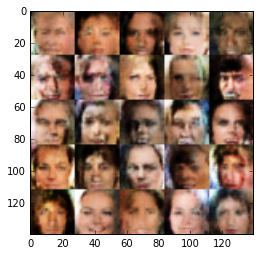

Epoch 1/1... Step: 2110 Discriminator Loss: 1.1052... Generator Loss: 0.8224
Epoch 1/1... Step: 2120 Discriminator Loss: 0.7902... Generator Loss: 1.4142
Epoch 1/1... Step: 2130 Discriminator Loss: 0.7812... Generator Loss: 1.2670
Epoch 1/1... Step: 2140 Discriminator Loss: 0.7549... Generator Loss: 1.3729
Epoch 1/1... Step: 2150 Discriminator Loss: 1.0309... Generator Loss: 0.8746
Epoch 1/1... Step: 2160 Discriminator Loss: 0.8812... Generator Loss: 1.0978
Epoch 1/1... Step: 2170 Discriminator Loss: 0.7708... Generator Loss: 1.7107
Epoch 1/1... Step: 2180 Discriminator Loss: 0.9375... Generator Loss: 1.4055
Epoch 1/1... Step: 2190 Discriminator Loss: 1.1551... Generator Loss: 0.9686
Epoch 1/1... Step: 2200 Discriminator Loss: 0.6492... Generator Loss: 1.8765
Generating outputs...


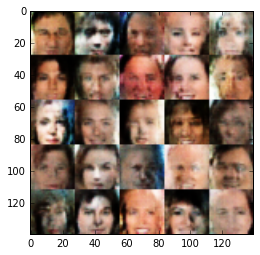

Epoch 1/1... Step: 2210 Discriminator Loss: 0.8387... Generator Loss: 1.4318
Epoch 1/1... Step: 2220 Discriminator Loss: 1.2205... Generator Loss: 0.6777
Epoch 1/1... Step: 2230 Discriminator Loss: 0.9446... Generator Loss: 1.2593
Epoch 1/1... Step: 2240 Discriminator Loss: 0.9554... Generator Loss: 1.1459
Epoch 1/1... Step: 2250 Discriminator Loss: 0.9756... Generator Loss: 0.9282
Epoch 1/1... Step: 2260 Discriminator Loss: 1.0461... Generator Loss: 1.1225
Epoch 1/1... Step: 2270 Discriminator Loss: 1.0240... Generator Loss: 0.8244
Epoch 1/1... Step: 2280 Discriminator Loss: 0.9034... Generator Loss: 1.0645
Epoch 1/1... Step: 2290 Discriminator Loss: 0.8382... Generator Loss: 1.2357
Epoch 1/1... Step: 2300 Discriminator Loss: 0.7032... Generator Loss: 1.5486
Generating outputs...


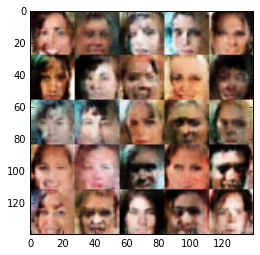

Epoch 1/1... Step: 2310 Discriminator Loss: 0.8522... Generator Loss: 1.3309
Epoch 1/1... Step: 2320 Discriminator Loss: 1.3132... Generator Loss: 0.5338
Epoch 1/1... Step: 2330 Discriminator Loss: 1.0508... Generator Loss: 0.9065
Epoch 1/1... Step: 2340 Discriminator Loss: 0.8692... Generator Loss: 1.2197
Epoch 1/1... Step: 2350 Discriminator Loss: 0.8028... Generator Loss: 1.3146
Epoch 1/1... Step: 2360 Discriminator Loss: 0.6267... Generator Loss: 1.7168
Epoch 1/1... Step: 2370 Discriminator Loss: 1.1390... Generator Loss: 0.8421
Epoch 1/1... Step: 2380 Discriminator Loss: 0.8690... Generator Loss: 1.3422
Epoch 1/1... Step: 2390 Discriminator Loss: 0.9734... Generator Loss: 0.9532
Epoch 1/1... Step: 2400 Discriminator Loss: 0.8706... Generator Loss: 1.4300
Generating outputs...


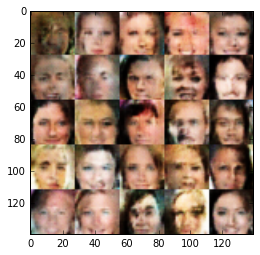

Epoch 1/1... Step: 2410 Discriminator Loss: 1.0448... Generator Loss: 1.0792
Epoch 1/1... Step: 2420 Discriminator Loss: 0.8101... Generator Loss: 1.1610
Epoch 1/1... Step: 2430 Discriminator Loss: 0.8246... Generator Loss: 1.4555
Epoch 1/1... Step: 2440 Discriminator Loss: 1.0006... Generator Loss: 0.8532
Epoch 1/1... Step: 2450 Discriminator Loss: 0.8368... Generator Loss: 1.6740
Epoch 1/1... Step: 2460 Discriminator Loss: 1.0913... Generator Loss: 0.7744
Epoch 1/1... Step: 2470 Discriminator Loss: 0.9887... Generator Loss: 1.0989
Epoch 1/1... Step: 2480 Discriminator Loss: 0.7804... Generator Loss: 1.4521
Epoch 1/1... Step: 2490 Discriminator Loss: 0.8632... Generator Loss: 1.2086
Epoch 1/1... Step: 2500 Discriminator Loss: 1.3048... Generator Loss: 0.5777
Generating outputs...


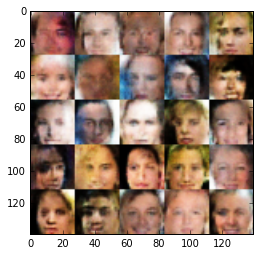

Epoch 1/1... Step: 2510 Discriminator Loss: 0.9532... Generator Loss: 1.0996
Epoch 1/1... Step: 2520 Discriminator Loss: 1.1811... Generator Loss: 0.6900
Epoch 1/1... Step: 2530 Discriminator Loss: 0.8469... Generator Loss: 1.2558
Epoch 1/1... Step: 2540 Discriminator Loss: 1.0515... Generator Loss: 0.9141
Epoch 1/1... Step: 2550 Discriminator Loss: 1.0225... Generator Loss: 0.9740
Epoch 1/1... Step: 2560 Discriminator Loss: 1.2196... Generator Loss: 2.0320
Epoch 1/1... Step: 2570 Discriminator Loss: 0.8295... Generator Loss: 1.3349
Epoch 1/1... Step: 2580 Discriminator Loss: 0.7694... Generator Loss: 1.5590
Epoch 1/1... Step: 2590 Discriminator Loss: 0.9242... Generator Loss: 1.2478
Epoch 1/1... Step: 2600 Discriminator Loss: 1.2531... Generator Loss: 0.6266
Generating outputs...


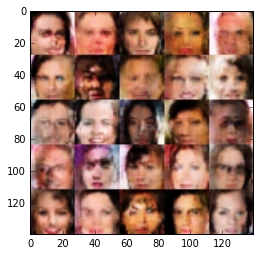

Epoch 1/1... Step: 2610 Discriminator Loss: 0.6685... Generator Loss: 1.5991
Epoch 1/1... Step: 2620 Discriminator Loss: 0.9950... Generator Loss: 1.0052
Epoch 1/1... Step: 2630 Discriminator Loss: 0.8439... Generator Loss: 1.6655
Epoch 1/1... Step: 2640 Discriminator Loss: 1.0735... Generator Loss: 1.3983
Epoch 1/1... Step: 2650 Discriminator Loss: 0.7107... Generator Loss: 1.5430
Epoch 1/1... Step: 2660 Discriminator Loss: 0.6141... Generator Loss: 2.0587
Epoch 1/1... Step: 2670 Discriminator Loss: 1.0775... Generator Loss: 0.9363
Epoch 1/1... Step: 2680 Discriminator Loss: 0.9329... Generator Loss: 1.1783
Epoch 1/1... Step: 2690 Discriminator Loss: 0.9123... Generator Loss: 0.9708
Epoch 1/1... Step: 2700 Discriminator Loss: 0.8984... Generator Loss: 1.1988
Generating outputs...


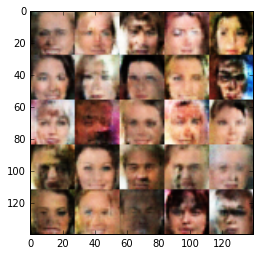

Epoch 1/1... Step: 2710 Discriminator Loss: 0.7289... Generator Loss: 1.5218
Epoch 1/1... Step: 2720 Discriminator Loss: 1.1225... Generator Loss: 0.7179
Epoch 1/1... Step: 2730 Discriminator Loss: 1.2454... Generator Loss: 0.6448
Epoch 1/1... Step: 2740 Discriminator Loss: 0.7244... Generator Loss: 1.5224
Epoch 1/1... Step: 2750 Discriminator Loss: 1.1427... Generator Loss: 0.7331
Epoch 1/1... Step: 2760 Discriminator Loss: 0.9878... Generator Loss: 1.1692
Epoch 1/1... Step: 2770 Discriminator Loss: 0.9174... Generator Loss: 1.4279
Epoch 1/1... Step: 2780 Discriminator Loss: 0.8336... Generator Loss: 1.5424
Epoch 1/1... Step: 2790 Discriminator Loss: 0.9422... Generator Loss: 1.0946
Epoch 1/1... Step: 2800 Discriminator Loss: 0.7372... Generator Loss: 1.6671
Generating outputs...


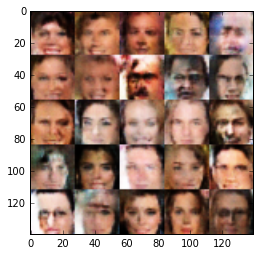

Epoch 1/1... Step: 2810 Discriminator Loss: 1.1082... Generator Loss: 0.8464
Epoch 1/1... Step: 2820 Discriminator Loss: 0.8558... Generator Loss: 1.5782
Epoch 1/1... Step: 2830 Discriminator Loss: 0.7447... Generator Loss: 1.3245
Epoch 1/1... Step: 2840 Discriminator Loss: 1.0699... Generator Loss: 0.7704
Epoch 1/1... Step: 2850 Discriminator Loss: 0.7291... Generator Loss: 1.7056
Epoch 1/1... Step: 2860 Discriminator Loss: 0.6900... Generator Loss: 1.5402
Epoch 1/1... Step: 2870 Discriminator Loss: 0.9002... Generator Loss: 1.0746
Epoch 1/1... Step: 2880 Discriminator Loss: 0.7646... Generator Loss: 1.2365
Epoch 1/1... Step: 2890 Discriminator Loss: 0.8775... Generator Loss: 1.1805
Epoch 1/1... Step: 2900 Discriminator Loss: 0.8538... Generator Loss: 1.4708
Generating outputs...


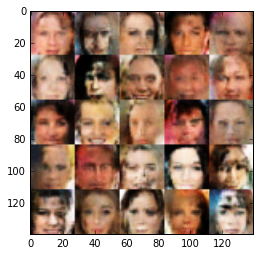

Epoch 1/1... Step: 2910 Discriminator Loss: 1.0544... Generator Loss: 0.7820
Epoch 1/1... Step: 2920 Discriminator Loss: 0.8321... Generator Loss: 1.1937
Epoch 1/1... Step: 2930 Discriminator Loss: 1.0967... Generator Loss: 0.7443
Epoch 1/1... Step: 2940 Discriminator Loss: 1.1075... Generator Loss: 0.7959
Epoch 1/1... Step: 2950 Discriminator Loss: 1.0790... Generator Loss: 0.8263
Epoch 1/1... Step: 2960 Discriminator Loss: 0.7449... Generator Loss: 1.7266
Epoch 1/1... Step: 2970 Discriminator Loss: 0.5915... Generator Loss: 1.8311
Epoch 1/1... Step: 2980 Discriminator Loss: 0.9668... Generator Loss: 1.0141
Epoch 1/1... Step: 2990 Discriminator Loss: 0.8980... Generator Loss: 1.0954
Epoch 1/1... Step: 3000 Discriminator Loss: 0.9242... Generator Loss: 0.9791
Generating outputs...


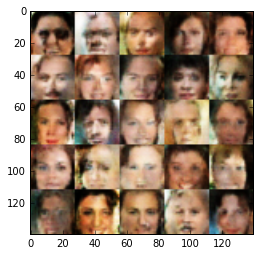

Epoch 1/1... Step: 3010 Discriminator Loss: 0.9695... Generator Loss: 1.0119
Epoch 1/1... Step: 3020 Discriminator Loss: 0.8166... Generator Loss: 1.4345
Epoch 1/1... Step: 3030 Discriminator Loss: 0.9095... Generator Loss: 1.0425
Epoch 1/1... Step: 3040 Discriminator Loss: 1.1525... Generator Loss: 0.8287
Epoch 1/1... Step: 3050 Discriminator Loss: 1.0116... Generator Loss: 0.8605
Epoch 1/1... Step: 3060 Discriminator Loss: 1.0936... Generator Loss: 0.8050
Epoch 1/1... Step: 3070 Discriminator Loss: 0.8250... Generator Loss: 1.2248
Epoch 1/1... Step: 3080 Discriminator Loss: 0.5593... Generator Loss: 2.0629
Epoch 1/1... Step: 3090 Discriminator Loss: 0.8181... Generator Loss: 1.2465
Epoch 1/1... Step: 3100 Discriminator Loss: 0.8736... Generator Loss: 1.2382
Generating outputs...


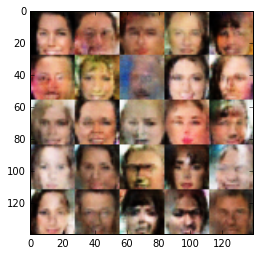

Epoch 1/1... Step: 3110 Discriminator Loss: 1.0286... Generator Loss: 0.9557
Epoch 1/1... Step: 3120 Discriminator Loss: 0.8904... Generator Loss: 1.0965
Epoch 1/1... Step: 3130 Discriminator Loss: 0.7760... Generator Loss: 1.5091
Epoch 1/1... Step: 3140 Discriminator Loss: 0.8041... Generator Loss: 1.3829
Epoch 1/1... Step: 3150 Discriminator Loss: 1.0413... Generator Loss: 0.8894
Epoch 1/1... Step: 3160 Discriminator Loss: 1.1705... Generator Loss: 0.6463


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0001
beta1 = 0.4


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.